# Residual Analysis

We will perform residual analysis or will check assumptions of regression model

In [1]:
#=============================================================================================
# CODE NAME     : Residual Analysis.py
# PURPOSE       : Demonstrate application of residual analysis using Pandas and statsmodels 
# APPLICATION   : Analyzing Fitness dataset
#==============================================================================================

In [1]:
# Load Input data
import numpy as np
import pandas as pd

fitness = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\fitness.xlsx")
fitness.head()

,Name,Gender,RunTime,Age,Weight,Oxygen_Consumption,Run_Pulse,Rest_Pulse,Maximum_Pulse,Performance
0,Donna,F,8.17,42,68.15,59.57,166,40,172,90
1,Gracie,F,8.63,38,81.87,60.06,170,48,186,94
2,Luanne,F,8.65,43,85.84,54.30,156,45,168,83
3,Mimi,F,8.92,50,70.87,54.63,146,48,155,67
4,Chris,M,8.95,49,81.42,49.16,180,44,185,72


In [3]:
# Fit a model selected based on Cp statistics for prediction
from statsmodels.formula.api import ols
model = ols('Oxygen_Consumption ~ RunTime + Age + Run_Pulse + Maximum_Pulse', data = fitness).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Oxygen_Consumption   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     33.01
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           7.68e-10
Time:                        12:15:50   Log-Likelihood:                -67.367
No. Observations:                  31   AIC:                             144.7
Df Residuals:                      26   BIC:                             151.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        97.1695     11.657      8.336      0.000      73.208     121.131
RunTime          -2.7758      0.342     -8.126      0.000      -3.478      -2.074
Age              -0.1890      0.094     -2.003      0.056      -0.383       0.005
Run_Pulse        -0.3457      0.118     -2.924      0.007      -0.589      -0.103
Maximum_Pulse     0.2719      0.134      2.023      0.053      -0.004       0.548
==============================================================================
Omnibus:                        0.144   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.036
Skew:                          -0.061   Prob(JB):                        0.982
Kurtosis:                       2.885   Cond. No.                     6.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Take the residuals and predicted values
res = model.resid
y_hat = model.fittedvalues

# Assumption 1: Normality of Residuals

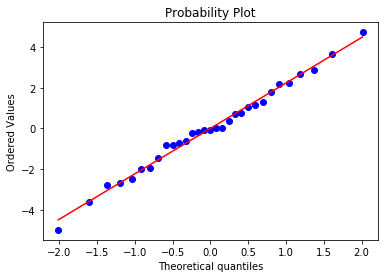

In [12]:
import scipy.stats as stat
import matplotlib.pyplot as plt

qqplot = stat.probplot(res, plot = plt)

# Assumption 2: Homoscedasticity of Variance 

Plot 1: Residual by Predicted values

Text(0, 0.5, 'Residuals')

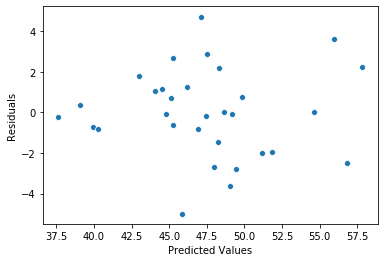

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

residualbypredicted = sns.scatterplot(y = res, x = y_hat)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

Plot 2: Residual by Predictors

Text(0, 0.5, 'Residuals')

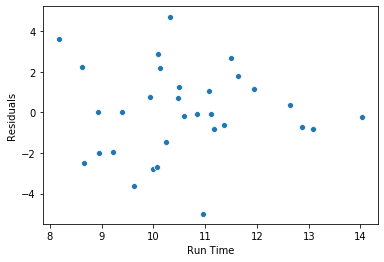

In [40]:
# RunTime + Age + Run_Pulse + Maximum_Pulse
residual_by_runtime = sns.scatterplot(x = fitness["RunTime"], y = res)
plt.xlabel("Run Time")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

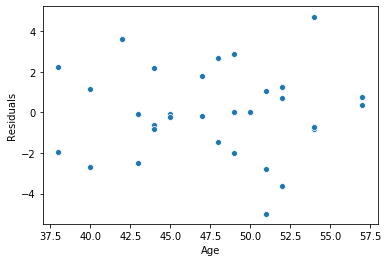

In [41]:
residual_by_age = sns.scatterplot(x = fitness["Age"], y = res)
plt.xlabel("Age")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

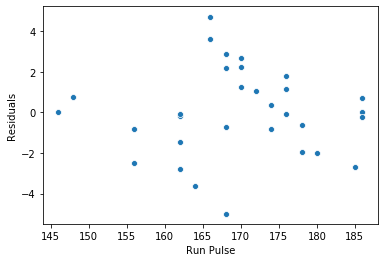

In [42]:
residual_by_Run_Pulse = sns.scatterplot(x = fitness["Run_Pulse"], y = res)
plt.xlabel("Run Pulse")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

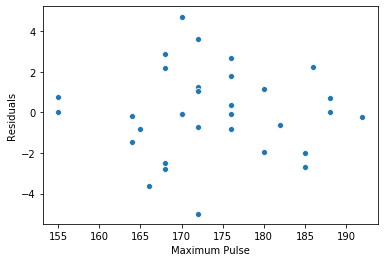

In [43]:
residual_by_Maximum_Pulse = sns.scatterplot(x = fitness["Maximum_Pulse"], y = res)
plt.xlabel("Maximum Pulse")
plt.ylabel("Residuals")